# 1. Mengimpor perpustakaan yang diperlukan untuk EDA
Berikut adalah perpustakaan-perpustakaan yang digunakan untuk melakukan EDA (Analisis data eksploratori) dalam tutorial ini.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisasi
import matplotlib.pyplot as plt             #visualisasi
%matplotlib inline
sns.set(color_codes=True)

# 2. Memuat data ke dalam data frame.
Memuat data ke dalam data frame pandas adalah salah satu langkah yang paling penting dalam EDA, karena kita dapat melihat bahwa nilai dari data set dipisahkan oleh koma. Jadi yang perlu kita lakukan adalah hanya membaca file CSV ke dalam data frame, dan data frame pandas akan melakukannya untuk kita.

Untuk mendapatkan atau memuat dataset ke dalam notebook, yang saya lakukan hanyalah satu langkah sederhana. Di Google Colab di sebelah kiri notebook, Anda akan menemukan tanda > (simbol lebih besar). Ketika Anda mengklik itu, Anda akan menemukan tab dengan tiga opsi, Anda hanya perlu memilih "Files". Kemudian Anda dapat dengan mudah mengunggah file Anda dengan bantuan opsi Upload. Tidak perlu mount ke Google Drive atau menggunakan perpustakaan khusus, cukup unggah dataset dan pekerjaan Anda selesai. Satu hal yang perlu diingat dalam langkah ini adalah bahwa file yang diunggah akan dihapus saat runtime ini di-recycle. Inilah cara saya mendapatkan dataset ke dalam notebook.

In [ ]:
df = pd.read_csv("/content/Customer.csv")
# Untuk menampilkan 5 baris teratas
df.head(5)

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [ ]:
df.dtypes

Customer ID      object
Customer Name    object
Segment          object
Age               int64
Country          object
City             object
State            object
Postal Code       int64
Region           object
dtype: object

# 4. Menghapus kolom yang tidak relevan
Langkah ini tentu diperlukan dalam setiap EDA karena terkadang ada banyak kolom yang tidak pernah kita gunakan, dalam kasus tersebut menghapus adalah satu-satunya solusi.

In [ ]:
df.dtypes

Customer ID      object
Customer Name    object
Segment          object
Age               int64
Country          object
City             object
State            object
Postal Code       int64
Region           object
dtype: object

# Merubah Nama Kolom

In [ ]:
df = df.rename(columns={"Customer ID" : "ID Pelanggan","Customer Name" : "Nama Pelanggan", "Segment" : "Segmen", "Age" : "Usia", "Country" : "Negara" , "City" : "Kota", "State" : "Provinsi", "Postal Code" : "Kode Pos","Region" : "Wilayah"})
df.head(10)

,ID Pelanggan,Nama Pelanggan,Segmen,Usia,Negara,Kota,Provinsi,Kode Pos,Wilayah
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South
5,IM-15070,Irene Maddox,Consumer,66,United States,Seattle,Washington,98103,West
6,HP-14815,Harold Pawlan,Home Office,20,United States,Fort Worth,Texas,76106,Central
7,PK-19075,Pete Kriz,Consumer,46,United States,Madison,Wisconsin,53711,Central
8,AG-10270,Alejandro Grove,Consumer,18,United States,West Jordan,Utah,84084,West
9,ZD-21925,Zuschuss Donatelli,Consumer,66,United States,San Francisco,California,94109,West


# 6. Menghapus baris duplikat
Ini seringkali hal yang berguna dilakukan karena data set yang besar seperti dalam kasus ini yang berisi lebih dari 10.000 baris seringkali memiliki beberapa data duplikat yang mungkin mengganggu, jadi di sini saya menghapus semua nilai duplikat dari data-set.

In [ ]:
df.shape

(793, 9)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("jumlah baris duplikat: ", duplicate_rows_df.shape)

jumlah baris duplikat:  (0, 9)


In [ ]:
df.count() #digunakan untuk menghitung jumlah baris dalam DataFrame. Ini berfungsi untuk menghitung jumlah baris dalam dataset Anda.

ID Pelanggan      793
Nama Pelanggan    793
Segmen            793
Usia              793
Negara            793
Kota              793
Provinsi          793
Kode Pos          793
Wilayah           793
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,ID Pelanggan,Nama Pelanggan,Segmen,Usia,Negara,Kota,Provinsi,Kode Pos,Wilayah
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [ ]:
df.count()

ID Pelanggan      793
Nama Pelanggan    793
Segmen            793
Usia              793
Negara            793
Kota              793
Provinsi          793
Kode Pos          793
Wilayah           793
dtype: int64

# 7. Menghapus nilai yang hilang atau null.
Ini sebagian besar mirip dengan langkah sebelumnya, tetapi di sini semua nilai yang hilang atau null dideteksi dan kemudian dihapus. Sekarang, ini bukan pendekatan yang baik untuk dilakukan, karena banyak orang hanya mengganti nilai yang hilang dengan rata-rata atau nilai tengah dari kolom tersebut. Tetapi dalam kasus ini, saya hanya menghapus nilai-nilai yang hilang tersebut.

In [ ]:
print(df.isnull().sum())

ID Pelanggan      0
Nama Pelanggan    0
Segmen            0
Usia              0
Negara            0
Kota              0
Provinsi          0
Kode Pos          0
Wilayah           0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

ID Pelanggan      793
Nama Pelanggan    793
Segmen            793
Usia              793
Negara            793
Kota              793
Provinsi          793
Kode Pos          793
Wilayah           793
dtype: int64

Sekarang kami telah menghapus semua baris yang mengandung nilai Null atau N/A.

In [ ]:
print(df.isnull().sum())   # After dropping the values

ID Pelanggan      0
Nama Pelanggan    0
Segmen            0
Usia              0
Negara            0
Kota              0
Provinsi          0
Kode Pos          0
Wilayah           0
dtype: int64


# 8.Pendeteksian Outliers
Outliers adalah titik atau set titik yang berbeda dari titik-titik lainnya. Terkadang, mereka dapat memiliki nilai yang sangat tinggi atau sangat rendah. Pendeteksian dan penanganan outliers adalah ide yang baik, karena outliers merupakan salah satu alasan utama yang dapat menghasilkan model yang kurang akurat. Oleh karena itu, mendeteksinya dan mengatasi outliers merupakan langkah yang penting.

In [ ]:
df.dtypes

ID Pelanggan      object
Nama Pelanggan    object
Segmen            object
Usia               int64
Negara            object
Kota              object
Provinsi          object
Kode Pos           int64
Wilayah           object
dtype: object

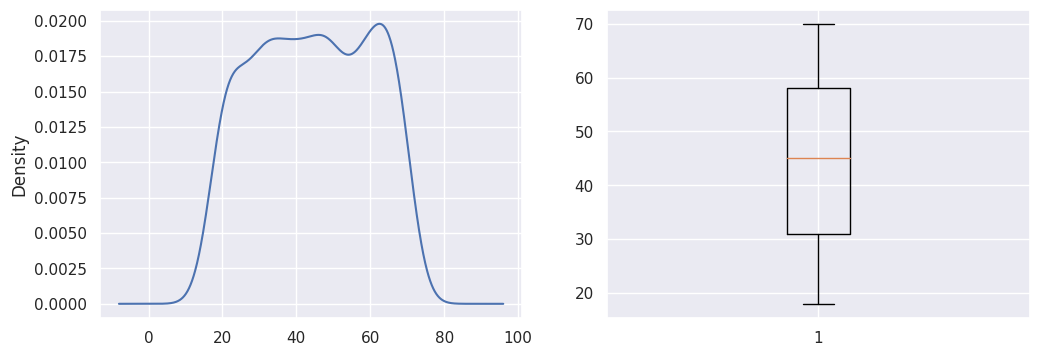

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Usia'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Usia'])
plt.show()

<Axes: xlabel='Usia'>

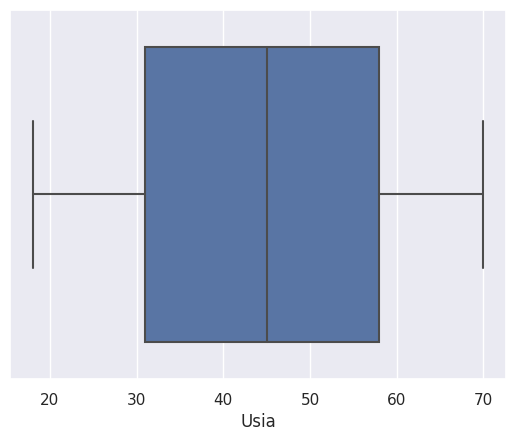

In [ ]:
sns.boxplot(x=df['Usia'])

# 9. Plot berbagai fitur terhadap satu sama lain (scatter), terhadap frekuensi (histogram)
Histogram

Histogram mengacu pada frekuensi kemunculan variabel dalam suatu interval. Dalam kasus ini, ada 38 Provinsi yang berbeda, tetapi sering penting untuk mengetahui siapa yang memiliki jumlah kasus terbanyak. Untuk melakukan ini, histogram adalah salah satu solusi yang sederhana yang memungkinkan kita mengetahui jumlah total kasus baru di berbagai provinsi.

In [ ]:
df['Usia'].describe()

count    793.000000
mean      44.467844
std       15.526673
min       18.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       70.000000
Name: Usia, dtype: float64

In [ ]:
df.dtypes

ID Pelanggan      object
Nama Pelanggan    object
Segmen            object
Usia               int64
Negara            object
Kota              object
Provinsi          object
Kode Pos           int64
Wilayah           object
dtype: object

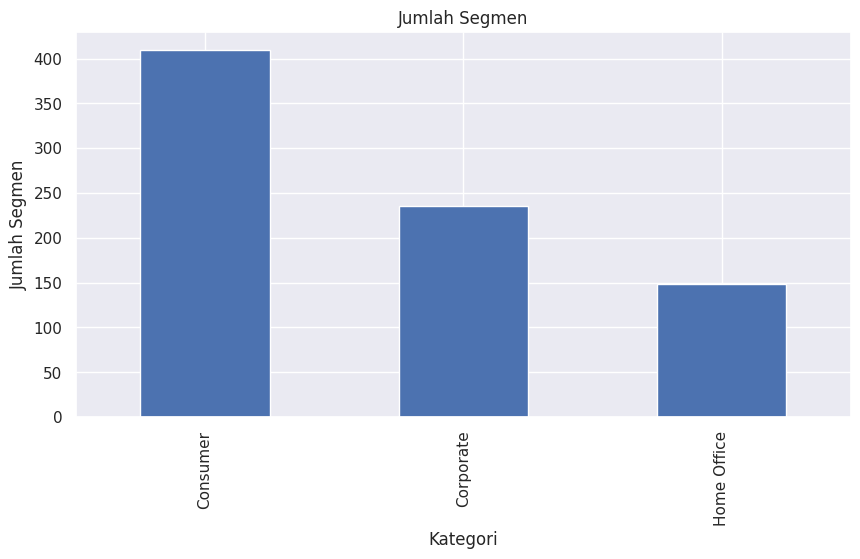

In [ ]:
df.Segmen.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Jumlah Segmen")
plt.ylabel('Jumlah Segmen')
plt.xlabel('Kategori');

# Heat Maps
Heat Maps adalah jenis plot yang diperlukan ketika kita perlu menemukan variabel-variabel yang saling tergantung. Salah satu cara terbaik untuk menemukan hubungan antara fitur-fitur dapat dilakukan menggunakan Heat Maps.

<ipython-input-90-ad9f4dae1d25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Usia,Kode Pos
Usia,1.000000,-0.019838
Kode Pos,-0.019838,1.000000


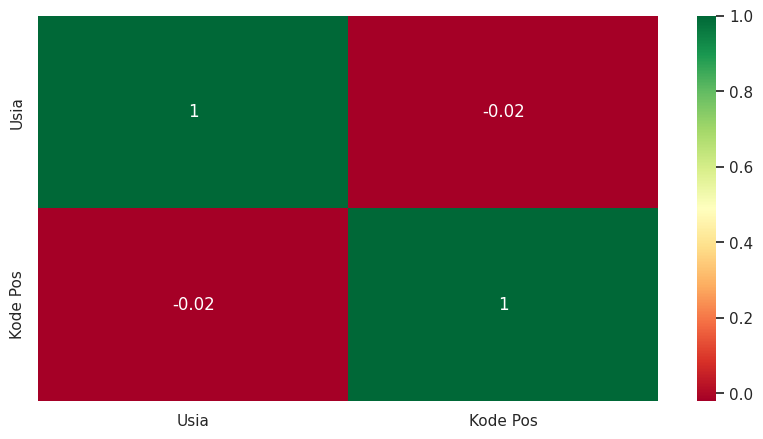

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

Wilayah        Central       East      South       West
Segmen                                                 
Consumer     46.088889  44.418182  45.750000  43.539007
Corporate    43.724138  46.089552  45.414634  42.985714
Home Office  40.611111  41.395349  46.360000  47.340909


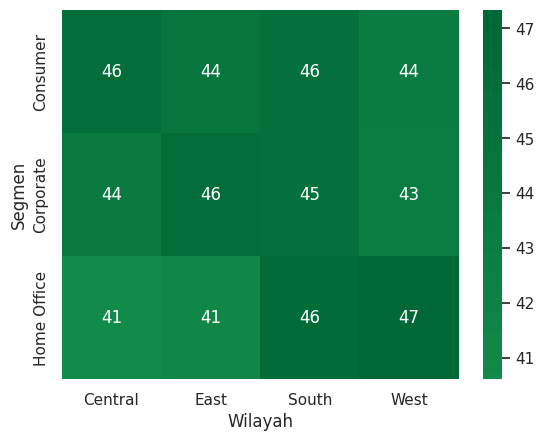

In [ ]:
result = pd.pivot_table(data=df, index='Segmen', columns='Wilayah',values='Usia')
print(result)

sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

#Scatterplot (Grafik Sebaran)
Biasanya kita menggunakan grafik sebaran (scatterplot) untuk menemukan korelasi antara dua variabel. Di sini, grafik sebaran dibuat antara Segmen dan Kota , dan kita bisa melihat grafik di bawah ini. Dengan grafik yang diberikan di bawah, kita dapat dengan mudah menggambar garis tren. Fitur-fitur ini memberikan penyebaran titik yang baik.

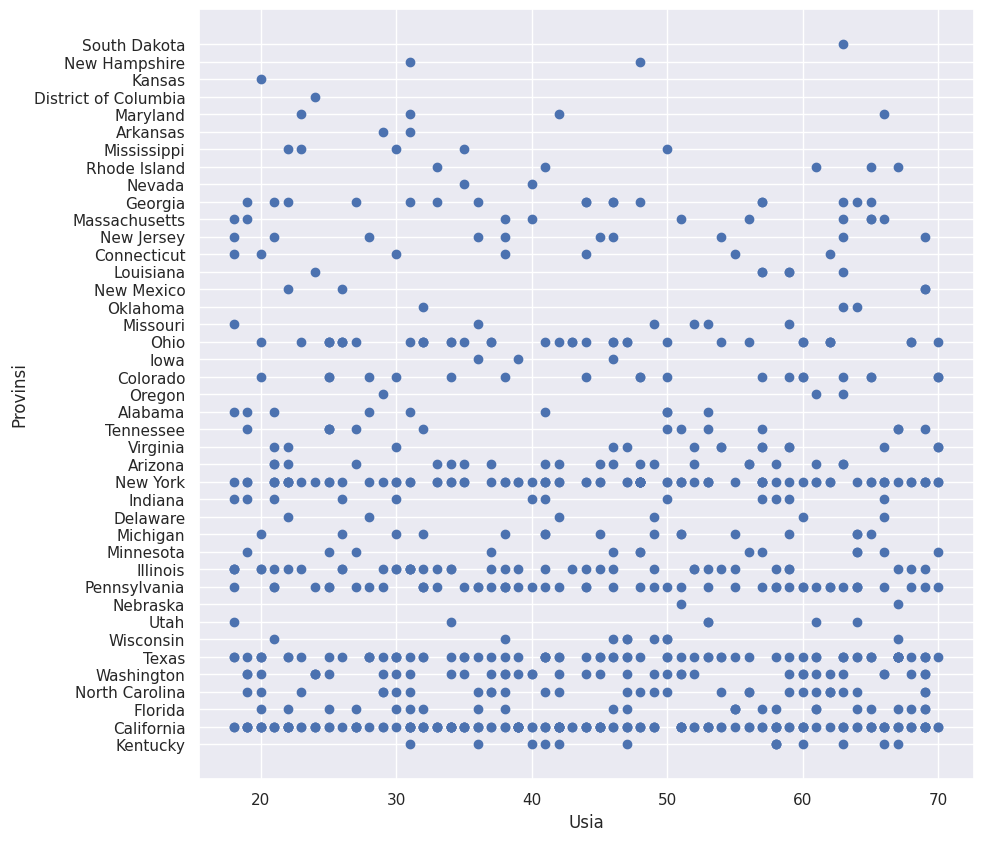

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df['Usia'], df['Provinsi'])
ax.set_xlabel('Usia')
ax.set_ylabel('Provinsi')
plt.show()

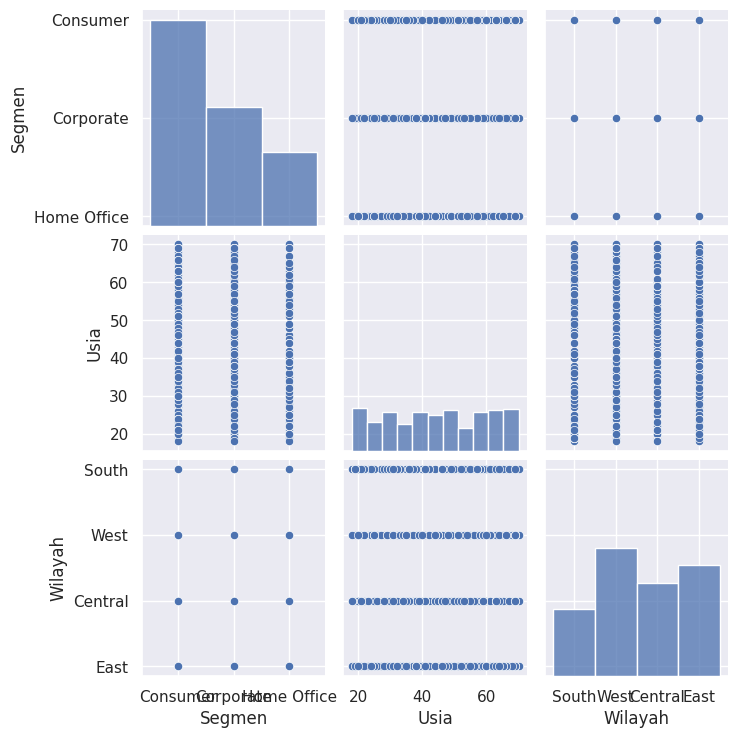

In [ ]:
sns.pairplot(data = df, vars=['Segmen','Usia','Wilayah'])
plt.show()

In [ ]:
df[['Kode Pos','Usia']].corr()

,Kode Pos,Usia
Kode Pos,1.000000,-0.019838
Usia,-0.019838,1.000000


In [ ]:
git remote add origin https://github.com/AdiNugroho22/Machine-Learning.git
git branch -M main
git push -u origin main

SyntaxError: ignored